# Image Upsert and Search using Pinecone

## Importing all required modules and setting up pinecone index

In [1]:
import os
import pinecone
import numpy as np
from PIL import Image
import feature_extractor as f

DATA_DIRECTORY = 'assignment4'
INDEX_NAME = 'fashion'
INDEX_DIMENSION = 4096
BATCH_SIZE=200

C:\Users\Ashish Mhatre\AppData\Roaming\Python\Python38\site-packages\pinecone\index.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## Setting up pinecone config

In [2]:
pinecone.init(api_key="5c1bd226-cec5-4eff-bb45-657933b3b8a9", environment="us-west4-gcp")
# if the index does not already exist, we create it
if INDEX_NAME not in pinecone.list_indexes():
    pinecone.create_index(name=INDEX_NAME, dimension=INDEX_DIMENSION)
# instantiate connection to your Pinecone index
index = pinecone.Index(INDEX_NAME)

## Upsert

1. firstly load the vectors from the given path by calling load_vector() func.
2. We use the batches() function to breakup the vectors into desired batch size, batch size should be <1000

In [9]:
def load_vectors(path):
    
    # Set the root directory path
    root_dir = path

    # Initialize an empty list to store the tuples
    file_list = []

    # Loop through all files in the root directory
    for filename in os.listdir(root_dir):
        # Check if the file is an npy file
        if filename.endswith('.npy'):
            # Load the npy file and append the tuple to the list
            file_path = os.path.join(root_dir, filename)
            file_name = os.path.splitext(filename)[0]
            np_array = np.load(file_path)
            file_list.append((file_name, np_array.tolist()))
    print(len(file_list))
    return file_list

def batches(lst, batch_size):
    """
    Divides a list into batches of a specified size.
    :param lst: The list to be divided.
    :param batch_size: The size of each batch.
    :return: A list of batches.
    """
    return [lst[i:i+batch_size] for i in range(0, len(lst), batch_size)]

In [4]:
#Loading the vectors 

file_list = load_vectors(r'.\static\feature')

1201


In [5]:
# Creating batches of 100s 

batches = batches(file_list, 100)

In [ ]:
## Begin Upsert of vectors(img_id, img_vec) to pinecone index 

for batch in batches:
    index.upsert(batch)

## Querying the index for image search

#### 1. Loading image data 
    a. Load image data by providing the path where the images are stored, images data will be loaded as a dict with img_filename as key and img_path as value 
#### 2. Query the index 
    b. Pass the path of input query image to input_query() along with number of matches required and index name.
    c. Store the resultant response
#### 3. Display results 
    d. Call output() as pass the response to display the search results 

In [4]:
#Load image data into dict

def load_imgpath(path):
    root_dir = path
    # define dict
    files_path = {}
    
    #loop through the files 
    for subdir, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith(".jpg"):
                #Extract img path
                img_path = os.path.join(subdir, file)
                #Extract subdict name and file name
                subdirectory_name = os.path.basename(subdir)
                file_name = os.path.splitext(file)[0] # e.g., ./static/img/xxx.jpg
                
                #append to dict 
                files_path['{sub}_{file}'.format(sub = subdirectory_name, file = file_name)] = img_path
    return files_path
                
            
            

In [5]:
def input_query(path,num,index):
    #Initialize feature extractor 
    fe = f.FeatureExtractor()
    
    #load input image
    img_path = path 
    #Convert ndarray to serializable list
    feature = fe.extract(img=Image.open(img_path)).tolist()
    
    #query index
    response = index.query(
    feature, 
    top_k=num)
    return response
    

In [6]:
def output(response):
    #Read the response and display image
    for responses in response['matches']:
        display(Image.open(files_path['{path}'.format(path = responses['id'])]))

## Execution 

In [7]:
# 1. Load image data
import os
files_path = load_imgpath(".\static\img")

In [8]:
# 2. Query the index

response = input_query(r"C:\Users\Ashish Mhatre\Downloads\1674205486661.jpg",5,index)

1/1 [==============================] - 0s 350ms/step


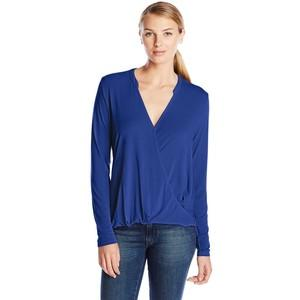

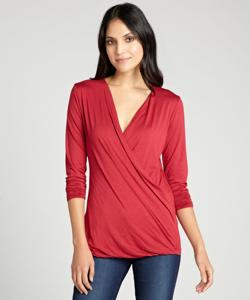

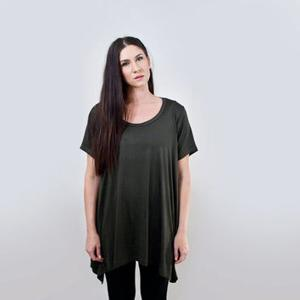

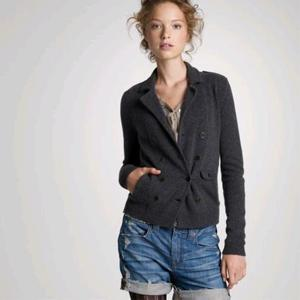

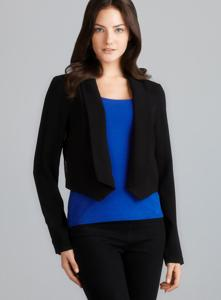

In [9]:
# 3. Display results 

output(response)

In [15]:
response['matches'][1]['score']

0.553771079